# Mervar - Kohonen Maps
### Alexander Mervar
### Professor Brown
### COGS-Q 355 SP22
### 2.9.2022

Consider a Kohonen self organizing feature map (SOFM), as described in Kohonen (1982). Consider a map with 2500 elements arranged in a 50x50 rectangular grid (matrix). Each input vector has 3 elements in the continuous range of [0,1] that correspond to a signal of one of the primary colors (red, green, blue). For example, (1, 0, 0) is an input pattern that corresponds to the color red.

Implement a simple SOFM in python following the equations described in Kohonen (1982), but simplified as follows. Assume a weight matrix W of dimensions 50x50x3, that connects each input to each SOFM unit. The input to each SOFM unit is the external input plus the lateral input:
- External Input = W * inputs (Equation 4 in Kohonen (1982))
- Activity from A (from perspective of B):
  - a * 8 ; If euclidean distance is between A and B < 3
  - a * -1 ; if euclidean distance is between A and B is > 3 < 8
  - 0 otherwise
- The total activity $\eta$ ("eta") of each SOFM is a piece-wise sigmoid
  - 0 if the sum of the external and lateral input is <= 0
  - 5 if the sum of the external and lateral input is >= 5
  - The sum of the external and lateral input, otherwise
- Weights W from the external inputs to the SOFM units are adjusted by the following rule
  - W(t+1) = (W(t) + learning*eta*inputs)/(the euclidean length of the input weights to the SOFM unit)
  - learning = 0.01

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


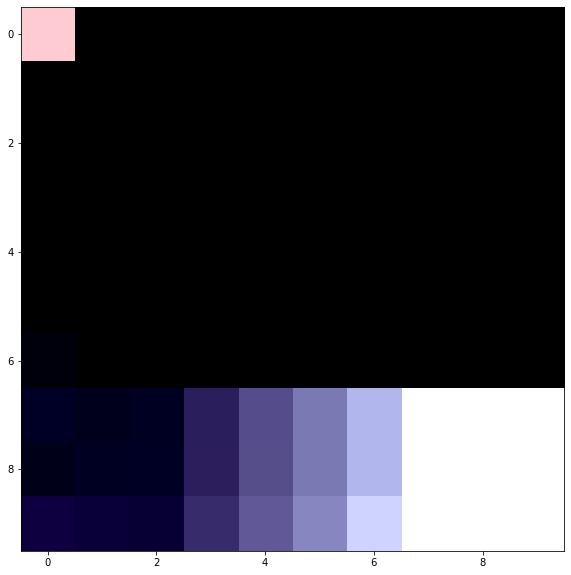

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from math import dist

fig, ax = plt.subplots(figsize=(10,10))

# Define Learning Rate
learningRate = 0.01

# Define weight matrix size
# TODO: Change to fit assignment
xSize = 10
ySize = 10
weightVectorSize = 3

# Define Frequency of Input Vectors
# TODO: Change to fit assignment
redFrequency = 1/3
greenFrequency = 2/3
blueFrequency  = 0

# Define the number of iterations
# TODO: Change to fit assignment
iterations = 500


# Define an random X*Y*WV array
weightMatrix = np.random.random((xSize, ySize, weightVectorSize))

for i in range(iterations):
    # Define a random input vector
    inputVectorSelector = random.random()

    # Create input vector
    if inputVectorSelector < redFrequency:
        inputVector = [1, 0, 0]
    elif inputVectorSelector < greenFrequency:
        inputVector = [0, 1, 0]
    else:
        inputVector = [0, 0, 1]

    # Traverse the matrix
    for j in range(xSize):
        for k in range(ySize):
            # Select the SOFM Unit
            selectedUnit = weightMatrix[j,k]

            # Calculate the external input (The dot product of the input vector and the weight vector)
            externalInput = np.dot(inputVector, selectedUnit)

            # Calculate the lateral input for the selected unit
            lateralInputSelectedUnit = externalInput * 8

            # Calculate the eta of the selcted unit
            if (lateralInputSelectedUnit + externalInput <= 0):
                eta = 0
            elif (lateralInputSelectedUnit + externalInput >= 5):
                eta = 5
            else:
                eta = lateralInputSelectedUnit + externalInput


            # Calculate the new weight vector for the selected unit
            for l in range(weightVectorSize):
                weightMatrix[j,k,l] = (weightMatrix[j,k,l] + learningRate * eta * (lateralInputSelectedUnit + externalInput))/dist(inputVector, selectedUnit)

            # Traverse to every other unit
            for l in range(xSize):
                for m in range(ySize):
                    if (i == l & j == m):
                        continue
                    else:
                        # Select a new SOFM Unit
                        selectedUnit2 = weightMatrix[l,m]

                        # TODO: Add wrap-around mechanic
                        # Calculate the lateral input
                        if (dist((j,k), (l,m)) < 3):
                            lateralInput = eta * 8
                        elif (8 > dist((j,k), (l,m)) > 3):
                            lateralInput = eta * -1
                        else:
                            lateralInput = 0

                        # Calculate the external input
                        externalInput2 = np.dot(weightMatrix[j,k], selectedUnit2)

                        # Calculate the change in weights
                        for n in range(weightVectorSize):
                            weightMatrix[l,m,n] = (weightMatrix[l,m,n] + learningRate * eta * (lateralInput + externalInput2))/dist(inputVector, selectedUnit2)

# Produce an Image
plt.imshow(weightMatrix)

plt.show()

ax.set_title("Mervar Kohonen Map")

fig.canvas.draw()

fig.canvas.flush_events()